In [2]:
import numpy as np
import matplotlib.pyplot as plt
from meas.rdspec import rdspec
from meas.rdstala_class import rdstala_class
from scipy.stats import linregress

In [3]:
#fname = 'Z:/data/IV/2023/02/20/ACO003_iv.dat'
fname = r'/Users/janahofmann/Desktop/Thesis/SolarCellData/IV/PP11AM04_iv.dat'
ff = rdstala_class(fname)
#print(f" {ff.p['filename']}")
#print(f" # of measurement values (per x value) : {ff.p['njw']:3d} ")
#print(f" # of x repeats (z1..z2) :               {ff.p['n1']:3d}   -> z     = {ff.z}") # =len(st.z)
#print(f" # of devices/samples :                  {ff.p['nsample']:3d}   -> s_dev = {ff.p['s_dev']}")
#print()
# extract specific measurement from:
idev, iz, ival = min(0, ff.p['nsample']-1), 0, 0
#print(f' retrieve x,    y for idev={idev}, iz={iz}, ival={ival} :')
x, y = ff.x, ff.y[ ff.scol(idev, iz, ival) ] 
#print(x)
#print()
#print(y)
#print()
#print(ff.p['comment'])# comment entered for measurement
#print(ff.p['sample'])#    sample name
#print(ff.p['operator'])#  operator
#print(ff.p['date'])#      date of measurement
#print(ff.p['T'])#         temperature during measurement
#print(ff.p['RH'])#        humidity during measurement
#print(ff.p['id_meas'])#        humidity during measurement

602
602
Linear fit equation around U=0 : y = 0.0009718107142857108 * x + -0.0015001246666666661
Linear fit equation around I=0 : y = 0.005069043452380951 * x + -0.0031597411202380944
Number of data points around U=0V : 15
Number of data points around I=0A : 8


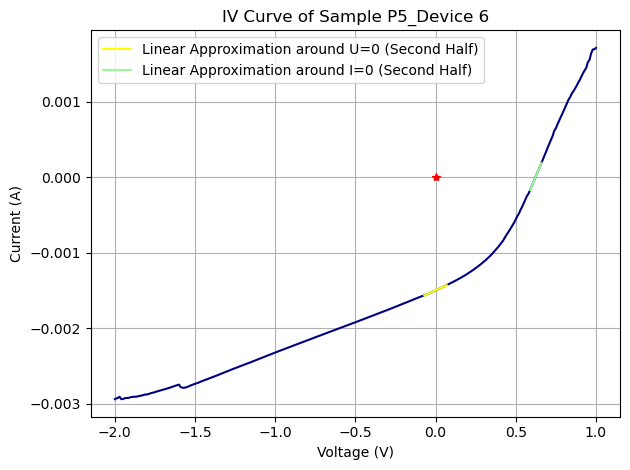

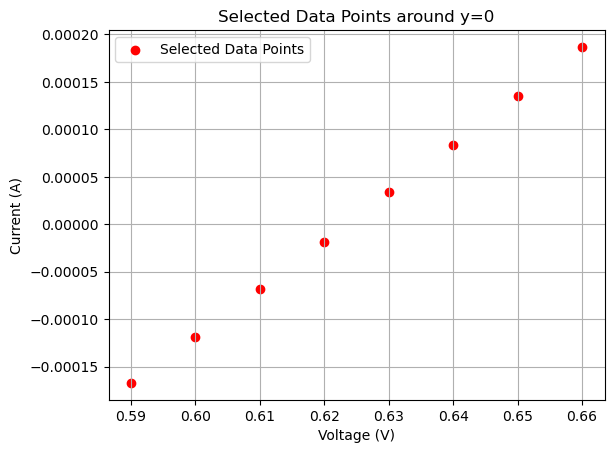

In [16]:
iz, ival = 0, 0
fname = r'/Users/janahofmann/Desktop/Thesis/SolarCellData/IV/PP11AM04_iv.dat'
ff = rdstala_class(fname)
idev = 0
x, y = ff.x, ff.y[ ff.scol(idev, iz, ival) ]
#slicing to only get first curve
plt.plot(x[:len(x)//2], y[:len(y)//2], color='navy')
plt.plot(0,0,'r*')

print(len(x))
print(len(y))
forwarx=np.array(x[0:301])
#print(forwarx)
forwary=np.array(y[0:301]*1000/0.089)
#print(forwary)
#plt.plot(forwarx,forwary)
#plt.savefig('Device1_iv_dark_forward.pdf')
# plot x vs y
#Which device from which cell looks good?
#Solar cell: 1                       2          3  4        5
#Device:     0(but only first curve) 2,3(File 00) 0 (0,1,2,4) 6 or 1
#We replace the 2nd one by another with same conditions

# Select data points around x=0 from the second half of the data
x_near_zero = x[:len(x)//2][np.abs(x[:len(x)//2]) < 0.08]  # Adjust the tolerance as needed
y_near_zero_x = y[:len(x)//2][np.abs(x[:len(x)//2]) < 0.08]  # Corresponding y values

# Perform linear regression for x values around x=0 from the second half of the data
coefficients_x = np.polyfit(x_near_zero, y_near_zero_x, 1)  # Fit a first-degree polynomial (linear fit)
slope_x, intercept_x = coefficients_x  # Extract slope and intercept
x_range_x = np.linspace(min(x_near_zero), max(x_near_zero), 100)
plt.plot(x_range_x, slope_x * x_range_x + intercept_x, color='yellow', label='Linear Approximation around U=0 (Second Half)')

# Select data points around y=0 from the second half of the data
y_near_zero_y = y[:len(y)//2][np.abs(y[:len(y)//2]) < 0.0002]  # Adjust the tolerance as needed
x_near_zero_y = x[:len(y)//2][np.abs(y[:len(y)//2]) < 0.0002]  # Corresponding x values

# Perform linear regression for y values around y=0 from the second half of the data
coefficients_y = np.polyfit(x_near_zero_y, y_near_zero_y, 1)  # Fit a first-degree polynomial (linear fit)
slope_y, intercept_y = coefficients_y  # Extract slope and intercept
x_range_y = np.linspace(min(x_near_zero_y), max(x_near_zero_y), 100)
plt.plot(x_range_y, slope_y * x_range_y + intercept_y, color='palegreen', label='Linear Approximation around I=0 (Second Half)')

# Print the linear fit equations
print("Linear fit equation around U=0 : y =", slope_x, "* x +", intercept_x)
print("Linear fit equation around I=0 : y =", slope_y, "* x +", intercept_y)
print("Number of data points around U=0V :", len(x_near_zero))
print("Number of data points around I=0A :", len(y_near_zero_y))
# Plot settings
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.grid()
plt.title("IV Curve of Sample P5_Device 6")
#plt.xlim(-0.2, 0.8)  # Adjust the limits as needed for x-axis
#plt.ylim(-0.002, 0.002)  # Adjust the limits as needed for y-axis
plt.legend()
plt.tight_layout()
#plt.savefig('Sample_P2_Device_1_iv_dark.png')
plt.show()

# Plot the selected data points
plt.scatter(x_near_zero_y, y_near_zero_y, color='red', label='Selected Data Points')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.grid()
plt.title("Selected Data Points around y=0")
plt.legend()
plt.show()


In [245]:
#Short-Circuit Current
index_zero = np.abs(x[:len(x)//2]).argmin()
y_at_zero = y[index_zero]

print("Short-Circuit Current is =", y_at_zero, "A/cm^2")



Short-Circuit Current is = -0.000244755 A/cm^2


In [246]:
#Open-Circuit Voltage
index_zero_y = np.abs(y[:len(y)//2]).argmin()
x_at_zero_y = x[index_zero_y]

print("Open-Circuit Voltage is =", x_at_zero_y, "V")

Open-Circuit Voltage is = 0.37 V


In [247]:
#P_MPP Point calculation
# Initialize variables to store maximum product and its corresponding pair
max_product = None
max_product_pair = None

# Loop through each pair of x and y values with x-values greater than 0 and y-values smaller than 0
for i in range(len(x)):
    # Check if x-value is greater than 0 and y-value is smaller than 0
    if x[i] > 0 and y[i] < 0:
        # Calculate product of x and y values at index i
        product = x[i] * y[i]
        
        # Check if product is greater than the current maximum product or if it's the first iteration
        if max_product is None or abs(product) > abs(max_product):
            # Update maximum product and its corresponding pair
            max_product = product
            max_product_pair = (x[i], y[i])

# Print maximum product pair and its value
print("Maximum product pair:", max_product_pair)
print("Maximum product value:", max_product)

Maximum product pair: (0.28, -0.000143326)
Maximum product value: -4.013128e-05


In [236]:
print("Linear fit equation around U=0 (Second Half): y =", slope_x, "* x +", intercept_x)
print("Linear fit equation around I=0 (Second Half): y =", slope_y, "* x +", intercept_y)
print("Number of data points around U=0 (Second Half):", len(x_near_zero))
print("Number of data points around I=0 (Second Half):", len(y_near_zero_y))

#I=-(U/R_P)+I_SC (i.e. x=0)
#U=-I*R_S+V_OC (i.e. y=0)
print("Actual R_P value:", 1/slope_x)
print("Actual R_S value:", slope_y)

Linear fit equation around U=0 (Second Half): y = 0.0009663280701754405 * x + -0.0014992089473684217
Linear fit equation around I=0 (Second Half): y = 0.004856887830434784 * x + -0.0030146045448840577
Number of data points around U=0 (Second Half): 19
Number of data points around I=0 (Second Half): 24
Actual R_P value: 1034.8452361716515
Actual R_S value: 0.004856887830434784


#short-ckt-current
for i in range (0,len(forwarx)):
    if i==200:
        print ('short circuit current is=', forwary[i])
